In [1]:
#Zadatak projekta je da odredimo prosečnu platu u zemljama Zapadnog Balkana#

In [2]:
#Učitavamo neophodno biblioteke#

import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

In [3]:
#Otvaramo tabelu i podešavamo opcije#

df = pd.read_csv('data.csv')
schema_df = pd.read_csv('data_schema.csv')

pd.set_option("display.max_columns",20)
pd.set_option("display.max_rows",20)

In [4]:
#Kreiramo filter po kome ćemo da izdvojimo potrebne zemlje#

zemlja = ["Serbia", "Bosnia and Herzegovina", "Croatia", "Montenegro", "Slovenia", "Albania"]
filter_zemlja = df["Country"].isin(zemlja)

In [5]:
#U šemi tražimo pitanje koje se odnosi na platu#

schema_df.iloc[24]['question']

'What is your current total <b>annual</b> compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent yearly salary. If you prefer not to answer, please leave the box empty.'

In [6]:
#Brišemo sve nepotrebne kolone#
#Ubacujemo domaće umesto stranih naziva#

df1 = df.loc[filter_zemlja,["Country", "CompTotal"]].reset_index()
df1 = df1.drop(columns=['index'])

srpski_nazivi = {'Country':'Zemlja', 'CompTotal':'Godišnja plata' }
df1 = df1.rename(columns=srpski_nazivi)

In [7]:
#Kreiramo kolonu koja će da sadrži mesečnu platu#

df1['Mesečna plata'] = df1['Godišnja plata']/12
df1.drop(columns='Godišnja plata', inplace = True)
df1

,Zemlja,Mesečna plata
0,Albania,462.916667
1,Serbia,8750.000000
2,Croatia,183.333333
3,Serbia,833333.333333
4,Slovenia,11666.666667
...,...,...
1158,Albania,NaN
1159,Slovenia,10416.666667
1160,Croatia,NaN
1161,Serbia,NaN


In [8]:
#Stavljamo domaće nazive#

nazivi_zemalja = {'Serbia': 'Srbija',
                  'Croatia':'Hrvatska',
                  'Slovenia':'Slovenija',
                  'Bosnia and Herzegovina':'Bosna i Hercegovina',
                  'Montenegro':'Crna Gora',
                  'Albania' : 'Albanija'
                 }
df1['Zemlja'] = df1['Zemlja'].map(nazivi_zemalja)

In [9]:
#Izdvajamo samo one odgovore čija je 'Mesečna plata' manja od 6000#
#Ovo je izuzetno grub kriterijum za filtriranje, ali na taj način izbegavamo ekstremne vrednosti#

df1 = df1.loc[df1["Mesečna plata"]<6000].reset_index().drop(columns=['index'])

In [10]:
#Tabelu grupisemo po zemljama#

zemlje_grupa = df1.groupby('Zemlja')

In [11]:
#Koristimo funkciju median umesto mean, jer ona je manje osetljiva na ekstremne vrednosti#

medijana = zemlje_grupa['Mesečna plata'].median()

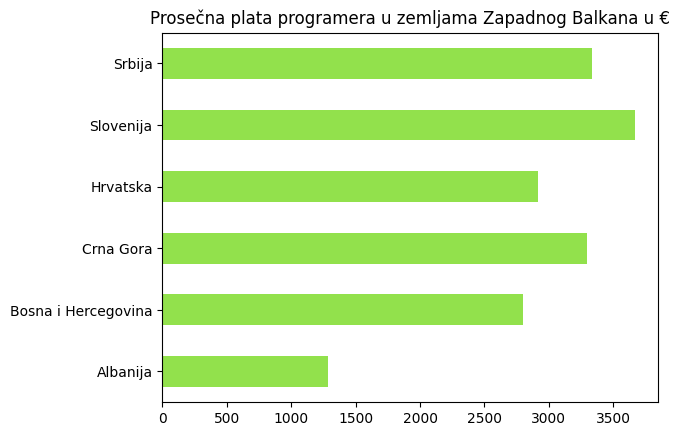

In [12]:
#Vršimo grafički prikaz#

medijana.plot(kind = 'barh',
              title = 'Prosečna plata programera u zemljama Zapadnog Balkana u €',
              color = '#92E14C',
              ylabel ='')
plt.show()